In [ ]:
pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 11.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from scipy.cluster import hierarchy
import pandas as pd

In [ ]:
# Specify the full path if the file is not in the current directory
file_path = "/content/dataPS.csv"
df = pd.read_csv(file_path)
df.head()

,Glucose,Sucrose,Fructose,Tannins,Phenolic Acids,Citric,Malic,Tartaric Acid,Alkaloids,Terpenes,Primary,Secondary
0,0.1,0.2,99.7,0,0.0,0,0,0,0,45.0,1,2
1,4.5,12.3,83.2,0,0.0,0,0,0,0,23.0,1,2
2,3.8,8.2,77.8,0,0.0,0,0,0,0,15.0,1,2
3,2.1,6.5,61.2,0,0.0,0,0,0,0,43.0,1,2
4,1.5,5.1,53.2,0,0.0,0,0,0,0,2.0,1,2


In [ ]:
# Convert the dataset to a NumPy array
herb_fingerprints = np.array(df)

Herb Molecular Fingerprint:
[[ 0.1  0.2 99.7  0.   0.   0.   0.   0.   0.  45.   1.   2. ]
 [ 4.5 12.3 83.2  0.   0.   0.   0.   0.   0.  23.   1.   2. ]
 [ 3.8  8.2 77.8  0.   0.   0.   0.   0.   0.  15.   1.   2. ]
 [ 2.1  6.5 61.2  0.   0.   0.   0.   0.   0.  43.   1.   2. ]
 [ 1.5  5.1 53.2  0.   0.   0.   0.   0.   0.   2.   1.   2. ]
 [ 1.7  4.8 48.2 15.  31.   0.   0.   0.   0.   0.   1.   3. ]
 [ 0.8  3.2 35.8  2.  12.   0.   0.   0.   0.   0.   1.   3. ]
 [ 2.4  6.1 52.7  3.   3.   0.   0.   0.   0.   0.   1.   3. ]
 [ 1.2  4.5 40.1  4.  21.   0.   0.   0.   0.   0.   1.   3. ]
 [ 1.9  5.8 47.5  4.  23.   0.   0.   0.   0.   0.   1.   3. ]
 [ 2.5  7.2 58.9  4.   0.   0.   0.   0.   0.   0.   1.   3. ]
 [ 1.8  5.4 46.2  4.  14.   0.   0.   0.   0.   0.   1.   3. ]
 [ 0.8  3.2  0.   0.   0.4 70.  15.  42.   0.   0.   4.   1. ]
 [ 2.4  6.1  0.   0.   0.  15.  20.  42.   0.   0.   4.   1. ]
 [ 1.2  4.5  0.   0.   0.   5.  10.  42.   0.   0.   4.   1. ]
 [ 1.9  5.8  0.   0.   0.  

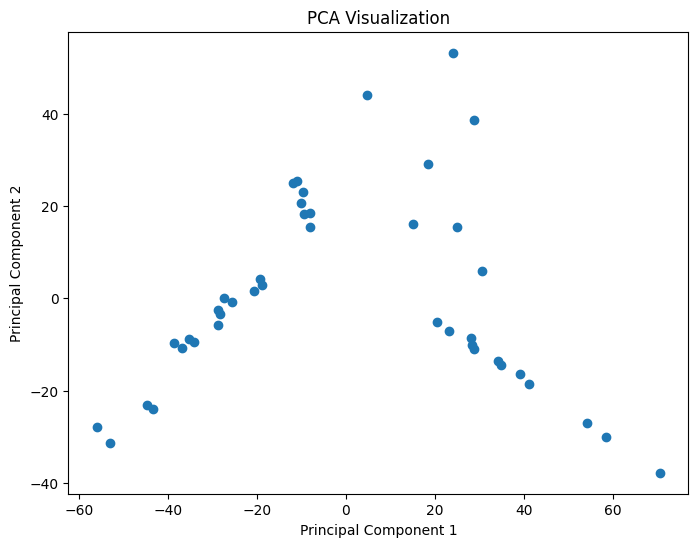

(42, 12)


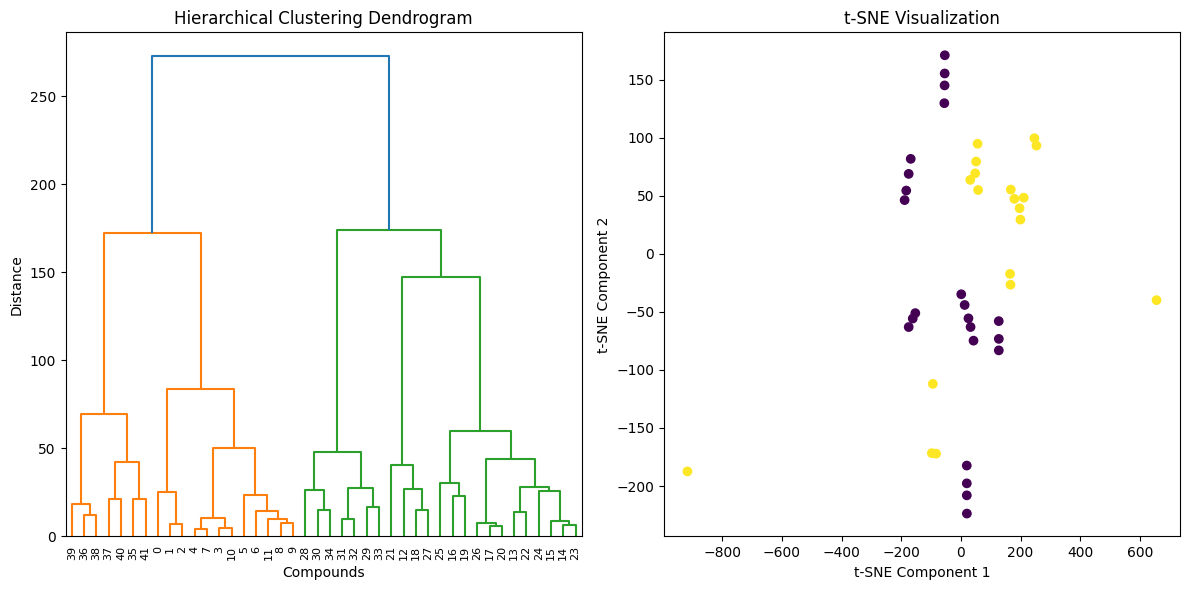

In [ ]:
# Print or use the generated fingerprint
print("Herb Molecular Fingerprint:")
print(herb_fingerprints)
# Calculate Tanimoto similarity between each pair of compounds
def tanimoto_similarity(fingerprint1, fingerprint2):
    intersection = np.sum(np.minimum(fingerprint1, fingerprint2))
    union = np.sum(np.maximum(fingerprint1, fingerprint2))
    similarity = intersection / union
    return similarity
# Define taste names based on similarity scores (dummy names, replace with actual taste names)
taste_mapping = {
    (0.7, 1.0): 'Sweet',
    (0.5, 0.7): 'Sour',
    (0.3, 0.5): 'Bitter',
    (0.1, 0.3): 'Salty',
    (0.0, 0.1): 'Umami'
}

# Initialize a dictionary to store the best three results for each compound
best_results = {}

# Calculate Tanimoto similarity between each pair of compounds
num_compounds = len(herb_fingerprints)

for i in range(num_compounds):
    # Initialize a list to store similarity scores and corresponding compounds
    similarity_scores = []

    for j in range(num_compounds):
        if i != j:  # Skip self-comparison
            similarity_score = tanimoto_similarity(herb_fingerprints[i, :-3], herb_fingerprints[j, :-3])

            # Determine the taste name based on the range
            taste_name = 'Unknown taste'
            for range_values, name in taste_mapping.items():
                if range_values[0] <= similarity_score <= range_values[1]:
                    taste_name = name
                    break

            # Add to the list
            similarity_scores.append((similarity_score, f"Compound {j + 1}: {taste_name}"))

    # Sort the list based on similarity scores and select the top three
    top_three = sorted(similarity_scores, reverse=True)[:3]

    # Store the best three results in the dictionary
    best_results[f"Compound {i + 1}"] = top_three

# Display the best three results for each compound
for compound, results in best_results.items():
    print(f"Results for {compound}:")
    for result in results:
        similarity_score, result_text = result
        print(f"{result_text} - Similarity Score: {similarity_score:.2f}")
    print()

# Calculate Tanimoto similarity between each pair of compounds
num_compounds = len(herb_fingerprints)
for i in range(num_compounds):
    for j in range(i + 1, num_compounds):
        similarity_score = tanimoto_similarity(herb_fingerprints[i, :-3], herb_fingerprints[j, :-3])
        print(f"Tanimoto Similarity between Compound {i + 1} and Compound {j + 1}: {similarity_score}")
pca = PCA(random_state=42)
embedding_pca = pca.fit_transform(herb_fingerprints[:, :-3])
pca = PCA(random_state=42)
embedding_pca = pca.fit_transform(herb_fingerprints[:, :-3])
print(embedding_pca.shape)
# Plot PCA results
plt.figure(figsize=(8, 6))

# Check the number of components
if embedding_pca.shape[1] == 1:
    plt.scatter(embedding_pca[:, 0], np.zeros_like(embedding_pca[:, 0]))
else:
    plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1])

plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print(herb_fingerprints.shape)
# Perform hierarchical clustering and t-SNE for visualization
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = clustering.fit_predict(herb_fingerprints[:, :-3])
# Compute pairwise distance matrix
distances = hierarchy.distance.pdist(herb_fingerprints[:, :-3])# Plot hierarchical clustering dendrogram and t-SNE visualization
plt.figure(figsize=(12, 6))
# Hierarchical clustering dendrogram
plt.subplot(1, 2, 1)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Compounds')
plt.ylabel('Distance')
dendrogram = hierarchy.dendrogram(hierarchy.linkage(distances, method='ward'))
# t-SNE visualization
plt.subplot(1, 2, 2)
plt.title('t-SNE Visualization')
tsne = TSNE(n_components=2, perplexity=1, random_state=42)
embedding_tsne = tsne.fit_transform(herb_fingerprints[:, :-3])
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()